In [98]:
from orphics import io, maps, lensing, cosmology, stats
from pixell import enmap, curvedsky
import numpy as np
import os, sys
import healpy as hp
import matplotlib.pylab as plt
import symlens as s
from symlens import utils
import importlib
from mpi4py import MPI
import pandas as pd
import tools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [99]:
# use maps provided by websky
map_path = 'maps/websky/'
# path of output data
data_path = 'data/'
# path of output plots
plot_path = 'plots/'

In [100]:
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1

In [101]:
# Read in reionization ksz and late-time ksz
ksz_ri = pd.read_csv(map_path + 'ksz_ri_cl.csv')
ksz_lt = pd.read_csv(map_path + 'ksz_lt_cl.csv')
lensed = pd.read_csv(map_path + 'lensed_cl.csv')
kap = pd.read_csv(map_path + 'kap_cl.csv')
bin_width = 20
bin_ellmin, bin_ellmax = 10, 6100

bin_ri_ells = ksz_ri['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_ri_cl = ksz_ri['ksz_cl'].values[bin_ellmin:bin_ellmax+1]

bin_lt_ells = ksz_lt['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_lt_cl = ksz_lt['ksz_cl'].values[bin_ellmin:bin_ellmax+1]

lensed_ells = lensed['ell'].values[bin_ellmin:bin_ellmax+1]
lensed_cl = lensed['lensed_cl'].values[bin_ellmin:bin_ellmax+1]

kap_ells = kap['ell'].values[bin_ellmin:bin_ellmax+1]
kap_cl = kap['kap_cl'].values[bin_ellmin:bin_ellmax+1]

In [102]:
importlib.reload(tools)
# smooth cls range and width
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1
# smooth ksz_ri_cl and ksz_lt_cl
S_ri = tools.bin_smooth(bin_ells, ksz_ri_cl, bin_width)
S_lt = tools.bin_smooth(bin_ells, ksz_lt_cl, bin_width)
S_lensed = tools.bin_smooth(bin_ells, lensed_cl, bin_width)
S_kap = tools.bin_smooth(bin_ells, kap_cl, bin_width)

smooth_ells, smooth_ksz_ri_cl = S_ri.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_ksz_lt_cl = S_lt.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_lensed_cl = S_lensed.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_kap_cl = S_kap.smooth(smooth_ellmin, smooth_ellmax, smooth_width)

<module 'tools' from '/global/cscratch1/sd/hongbo/new_reion-lens/tools.py'>

Text(0.5, 1.0, 'before smooth, ellmin=10 ellmax=6100')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'after smooth, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

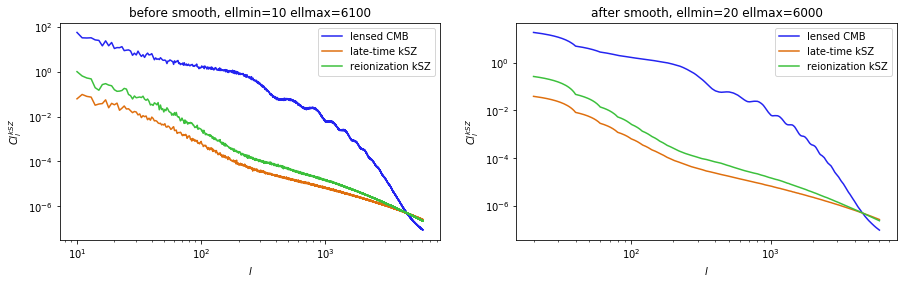

In [104]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].plot(bin_ells, lensed_cl)
#ax[0].plot(bin_ells, kap_cl)
ax[0].plot(bin_ells, ksz_lt_cl)
ax[0].plot(bin_ells, ksz_ri_cl)
ax[0].set_title(f'before smooth, ellmin={bin_ellmin} ellmax={bin_ellmax}')
ax[0].legend(['lensed CMB','late-time kSZ','reionization kSZ'])
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$l$')                                                                        
ax[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax[1].plot(smooth_ells, smooth_lensed_cl)
ax[1].plot(smooth_ells, smooth_ksz_lt_cl)
ax[1].plot(smooth_ells, smooth_ksz_ri_cl)
ax[1].set_title(f'after smooth, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax[1].legend(['lensed CMB','late-time kSZ','reionization kSZ'])
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$l$')                                                                        
ax[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path + 'ps.png')

In [87]:
ksz_lt_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_lt_cl])
ksz_ri_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_ri_cl])
smooth_ells = np.concatenate([np.arange(0, smooth_ellmin ,1), smooth_ells])
num = 10
ksz_lt_g_alm = hp.synalm(ksz_lt_cl) 
ksz_ri_g_alm = hp.synalm(ksz_ri_cl)
ksz_lt_g_cl = hp.alm2cl(ksz_lt_g_alm)
ksz_ri_g_cl = hp.alm2cl(ksz_ri_g_alm)

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Text(0.5, 1.0, 'ksz_cl, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'ksz_cl Gaussian realization, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

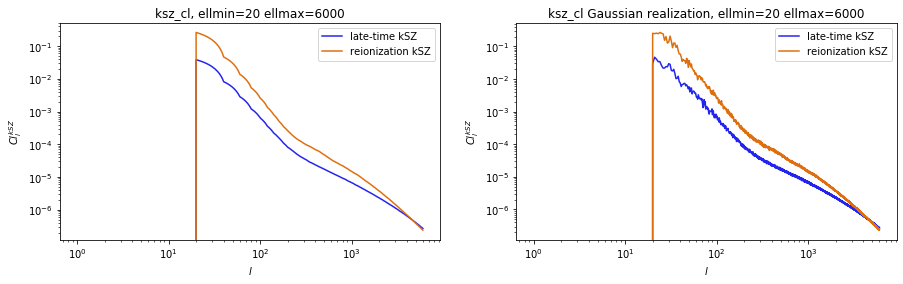

In [90]:
fig1, ax1 = plt.subplots(1,2,figsize=(15,4))

ax1[0].plot(smooth_ells, ksz_lt_cl)
ax1[0].plot(smooth_ells, ksz_ri_cl)
ax1[0].set_title(f'ksz_cl, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[0].legend(['late-time kSZ','reionization kSZ'])
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[0].set_xlabel('$l$')                                                                        
ax1[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax1[1].plot(smooth_ells, ksz_lt_g_cl)
ax1[1].plot(smooth_ells, ksz_ri_g_cl)
ax1[1].set_title(f'ksz_cl Gaussian realization, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[1].legend(['late-time kSZ','reionization kSZ'])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[1].set_xlabel('$l$')                                                                        
ax1[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path+'realizations_ksz_cl.png')

Text(0.5, 1.0, '$Cl_{l}^{kSZ}$')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

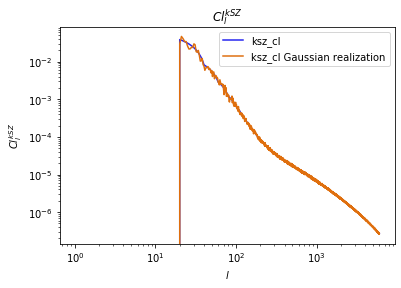

In [92]:
# check one realization ksz_cl_g and  ksz_cl
plt.loglog(smooth_ells, ksz_lt_cl)
plt.loglog(smooth_ells, ksz_lt_g_cl)
plt.legend([ 'ksz_cl', 'ksz_cl Gaussian realization'])
plt.title('$Cl_{l}^{kSZ}$')
plt.xlabel('$l$')
plt.ylabel('$Cl_{l}^{kSZ}$')
plt.savefig(plot_path+'realization_comparision.png')

In [93]:
# Write ksz_g_alm on disk
hp.write_alm(map_path+f'ksz_lt_g_alm_lmax_{smooth_ellmax}.fits', ksz_lt_g_alm, overwrite=True)
hp.write_alm(map_path+f'ksz_ri_g_alm_lmax_{smooth_ellmax}.fits', ksz_ri_g_alm, overwrite=True)